
Summary for Original Dataset:

   masterCategory  subCategory         articleType  count
0     Accessories  Accessories  Accessory Gift Set     97
1     Accessories  Accessories      Hair Accessory      1
2     Accessories  Accessories           Key chain      2
3     Accessories  Accessories       Messenger Bag     10
4     Accessories  Accessories    Travel Accessory     15
5     Accessories  Accessories        Water Bottle      4
6     Accessories         Bags           Backpacks    722
7     Accessories         Bags            Clutches    289
8     Accessories         Bags          Duffel Bag     88
9     Accessories         Bags            Handbags   1757
10    Accessories         Bags          Laptop Bag     81
11    Accessories         Bags       Messenger Bag     34
12    Accessories         Bags        Mobile Pouch     47
13    Accessories         Bags           Rucksacks     11
14    Accessories         Bags       Tablet Sleeve      3
15    Accessories         Bags    Travel

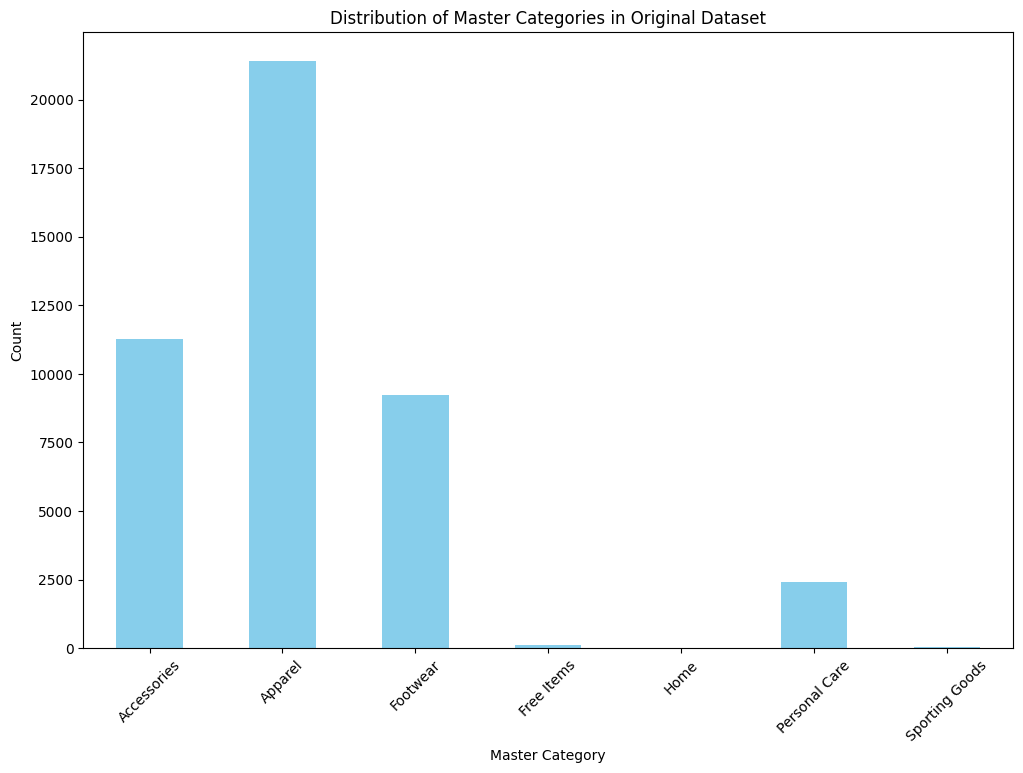


Summary for Custom Dataset:

   masterCategory subCategory   articleType  count
0     Accessories        Bags      Handbags      2
1     Accessories       Belts         Belts      1
2     Accessories   Jewellery       Pendant      1
3     Accessories     Scarves       Scarves      1
4         Apparel  Bottomwear         Jeans      1
5         Apparel  Bottomwear        Shorts      1
6         Apparel     Topwear   Sweatshirts      1
7         Apparel     Topwear       Tshirts      2
8        Footwear  Flip Flops    Flip Flops      1
9        Footwear       Shoes  Casual Shoes      1
10       Footwear       Shoes         Flats      1
11       Footwear       Shoes         Heels      1
12       Footwear       Shoes  Sports Shoes      1
13  Personal Care   Fragrance       Perfume      1
14  Personal Care        Lips      Lipstick      1
15  Personal Care   Skin Care   Cotton pads      1
16  Personal Care   Skin Care      Headband      1
17  Personal Care   Skin Care   Wrist Bands      1


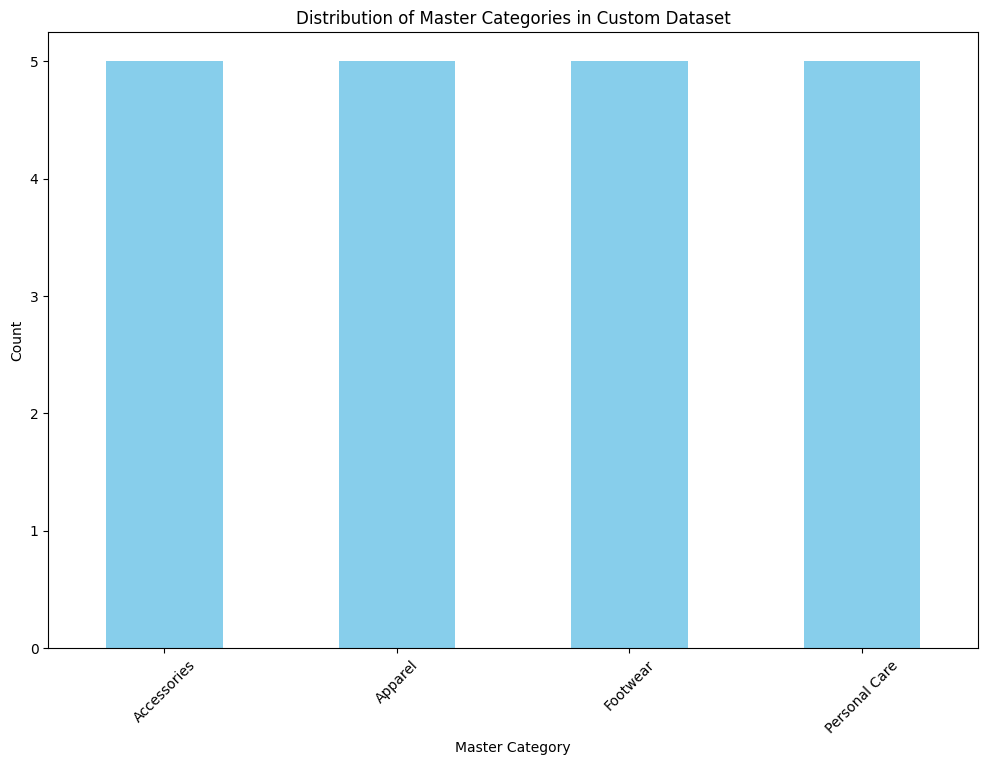


Sub Categories in Custom Dataset:
    subCategory  count
0         Bags      2
1        Belts      1
2   Bottomwear      2
3   Flip Flops      1
4    Fragrance      1
5    Jewellery      1
6         Lips      1
7      Scarves      1
8        Shoes      4
9    Skin Care      3
10     Topwear      3

Article Types in Custom Dataset:
      articleType  count
0          Belts      1
1   Casual Shoes      1
2    Cotton pads      1
3          Flats      1
4     Flip Flops      1
5       Handbags      2
6       Headband      1
7          Heels      1
8          Jeans      1
9       Lipstick      1
10       Pendant      1
11       Perfume      1
12       Scarves      1
13        Shorts      1
14  Sports Shoes      1
15   Sweatshirts      1
16       Tshirts      2
17   Wrist Bands      1


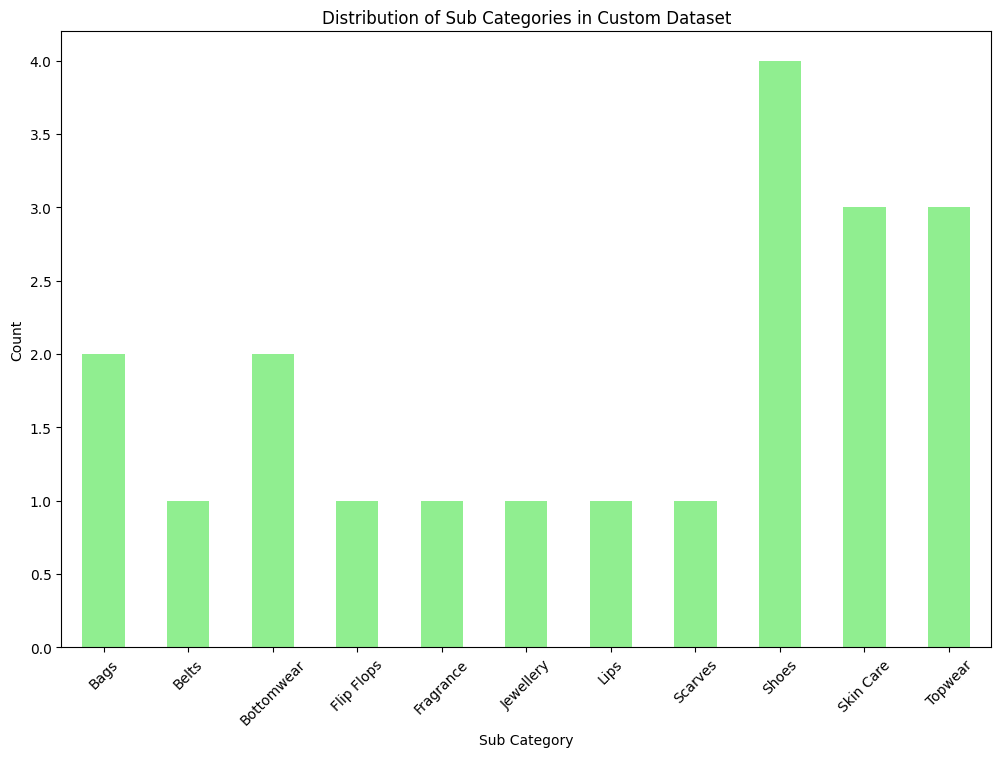

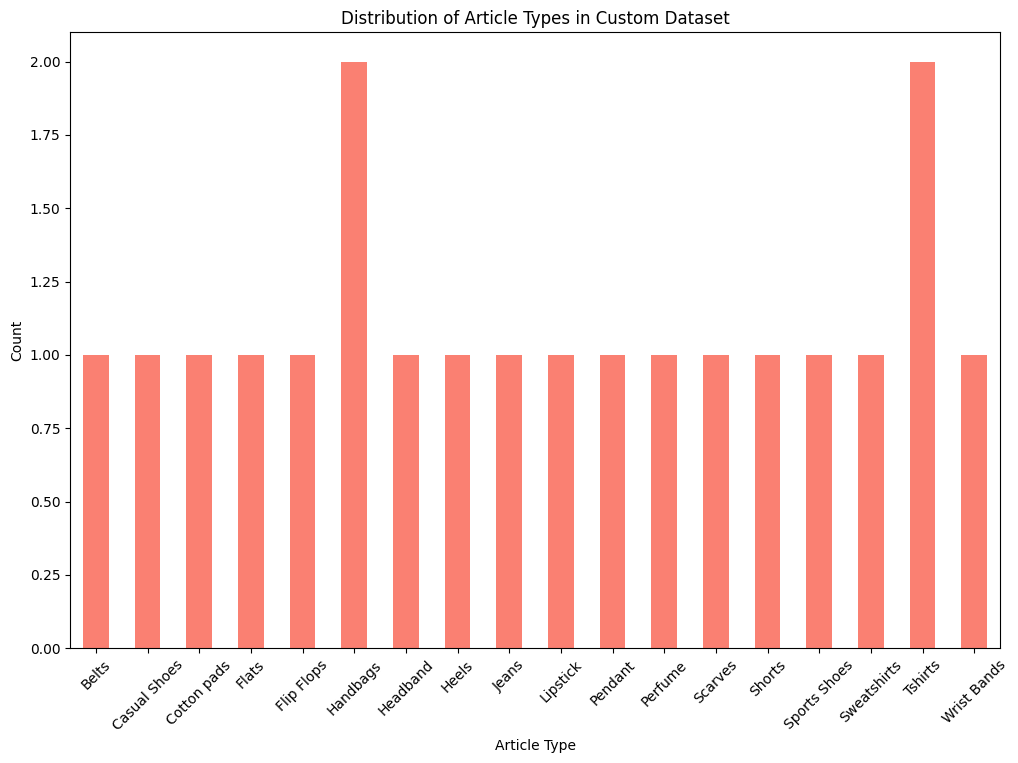

In [2]:
#Use Kernel Python 3.11
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
custom_metadata_path = 'custom_clothing_metadata.csv'  # my own dataset
original_metadata_path = 'cleaned_metadata.csv'  # dataset from kaggle

custom_metadata = pd.read_csv(custom_metadata_path)
original_metadata = pd.read_csv(original_metadata_path)

# Function to generate summary statistics
def generate_summary(metadata, title, plot_details=True):
    summary = metadata.groupby(['masterCategory', 'subCategory', 'articleType']).size().reset_index(name='count')
    print(f"\nSummary for {title}:\n")
    print(summary.head(20))  # Show the first 20 rows for a detailed view
    
    # Plotting only the master category distribution
    plt.figure(figsize=(12, 8))
    summary.groupby('masterCategory')['count'].sum().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Master Categories in {title}')
    plt.xlabel('Master Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    if plot_details:
        # Displaying a list of subcategories and article types
        sub_category_summary = summary.groupby('subCategory')['count'].sum().reset_index()
        article_type_summary = summary.groupby('articleType')['count'].sum().reset_index()

        print(f"\nSub Categories in {title}:\n", sub_category_summary.head(20))  # Show the first 20 rows for sub categories
        print(f"\nArticle Types in {title}:\n", article_type_summary.head(20))  # Show the first 20 rows for article types

        plt.figure(figsize=(12, 8))
        summary.groupby('subCategory')['count'].sum().plot(kind='bar', color='lightgreen')
        plt.title(f'Distribution of Sub Categories in {title}')
        plt.xlabel('Sub Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(12, 8))
        summary.groupby('articleType')['count'].sum().plot(kind='bar', color='salmon')
        plt.title(f'Distribution of Article Types in {title}')
        plt.xlabel('Article Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Generate summaries for both datasets
generate_summary(original_metadata, "Original Dataset", plot_details=False)
generate_summary(custom_metadata, "Custom Dataset")
